# Heuristica de Clark-Wright - Ejemplo del caso general

## Generalizacion
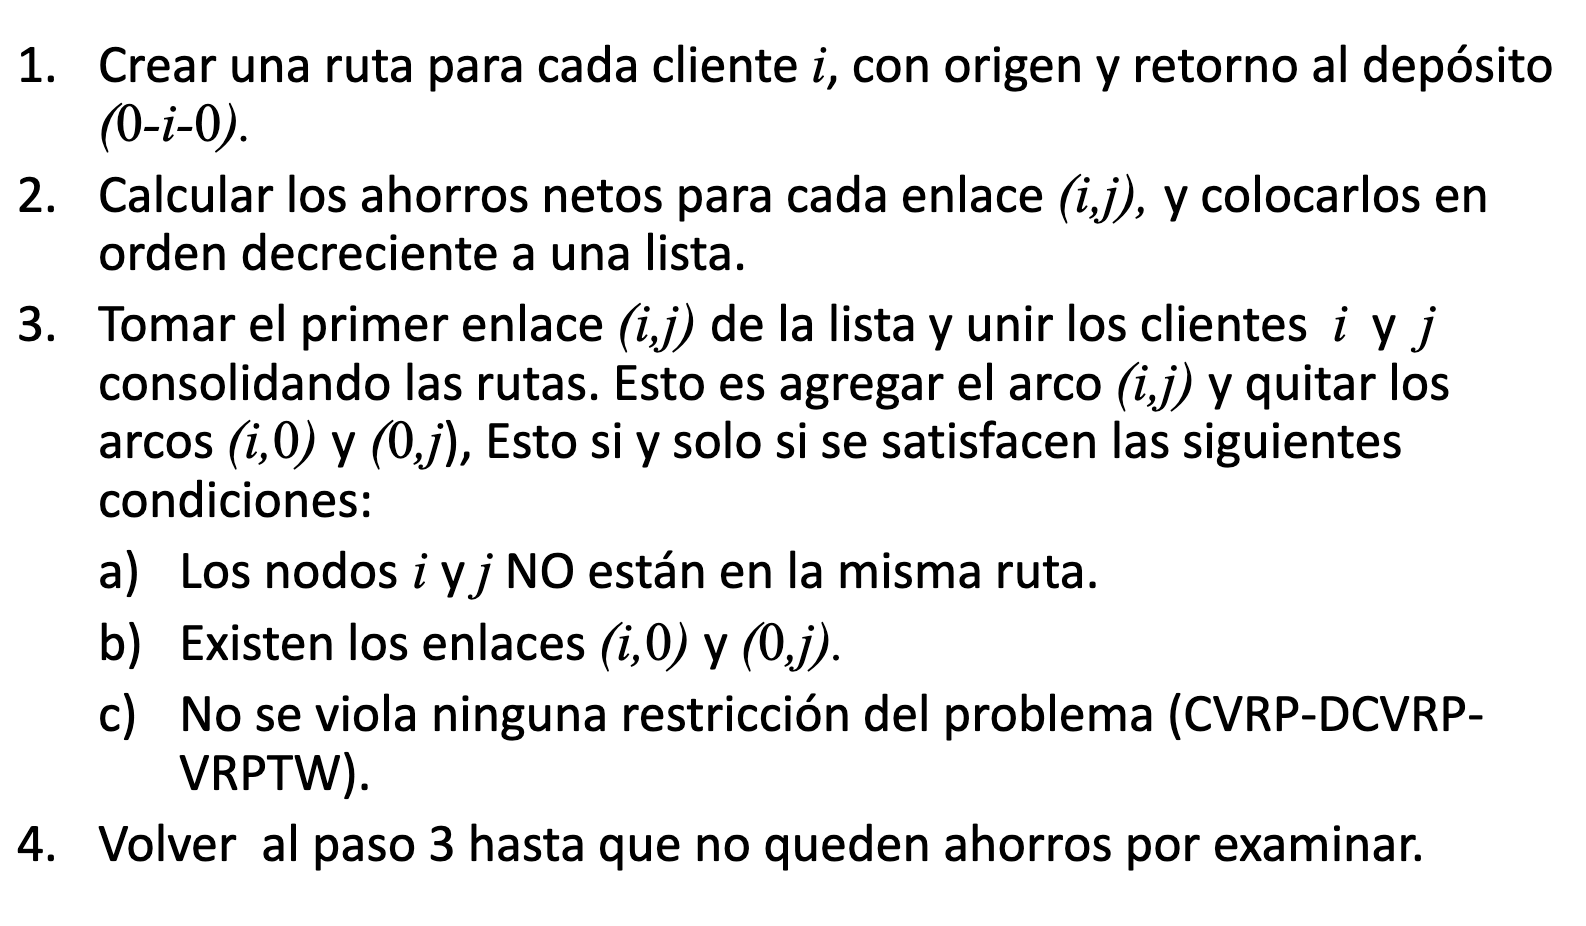


## 1. Datos iniciales del problema

In [ ]:
# Importacion de librerias
import numpy as np
import pandas as pd

# a. Matriz de distancias
dist = np.array(
    [
        [0, 9, 15, 8, 7],
        [9, 0, 12, 10, 13],
        [15, 12, 0, 8, 8],
        [8, 9, 10, 0, 7],
        [7, 13, 8, 7, 0],
    ]
)

## 2. Ruta para cada cliente $i$, con origen y retorno al deposito (0,$i$,0) y ahorros netos para cada enlace ($i$,$j$)

In [ ]:
# b. Numero de clientes + deposito
clientes = [0, 1, 2, 3, 4]

costo_inicial = sum(dist[0,i]+dist[i,0] for i in clientes if i != 0)
print(f"Costo inicial: {costo_inicial}")

rutas = {i: [0, i, 0] for i in clientes if i != 0}
print(rutas)
# c. Calcular matriz de ahorros - S(i,j) = d(i,0) + d(0,j) - d(i,j)

ahorros = np.zeros(
    (len(clientes), len(clientes)), dtype=int
)  # Matriz de ahorros inicializada en ceros

for index_i, i in enumerate(clientes):  # Iterar sobre cada cliente i
    for index_j, j in enumerate(clientes):  # Iterar sobre cada cliente j
        if i != j:  # Evitar calcular ahorro para el mismo cliente
            ahorros[index_i, index_j] = dist[i, 0] + dist[0, j] - dist[i, j]
            
# d. Mostrar matriz de distancias y matriz de ahorros como DataFrame de pandas
df_ahorros = pd.DataFrame(ahorros, columns=clientes, index=clientes)
df_dist = pd.DataFrame(dist, columns= clientes, index=clientes)

print("\nMatriz de distancias:")
print(df_dist)
print("\nMatriz de ahorros:")
print(df_ahorros)

## 3. Meter los ahorros a una lista en orden descendente

In [ ]:
# e. Lista de tuplas (i,j,ahorro) en orden descendente de ahorro
lista_ahorros = []
for i in range(len(clientes)):
    for j in range(len(clientes)):
        if i != j and(i!=0 and j!=0):
            lista_ahorros.append((clientes[i], clientes[j], int(ahorros[i, j])))
            
lista_ahorros = sorted(lista_ahorros, key=lambda x: x[2], reverse=True)
print("\nLista de ahorros en orden descendente:")
for item in lista_ahorros:
    print(item)

## 4. Construccion de las rutas

Para cada par ($i$,$j$) en la lista de ahorros, debemos ver:
- Los nodos $i$ y $j$ NO están en la misma ruta.
- Existen los enlaces ($i$,0) y ($0$,j).
- No se viola ninguna restricción del problema (CVRP-DCVRP-VRPTW)

Si se cumplen las condiciones, se elimina los enlaces ($i$,0) y ($0$,j) y se agrega el enlace ($i$,$j$).

In [ ]:
rutas_consolidadas = []  # Lista para almacenar las rutas consolidadas
which_route = {i: i for i in clientes if i != 0}  # Mapea cada cliente a su ruta inicial
rutas = {i: [0, i, 0] for i in clientes if i != 0}  # Rutas iniciales
contador = 0
ahorro_total = 0

for i, j, ahorro in lista_ahorros:
    contador = contador + 1
    print(f"\nIteracion {contador}")
    # Verificacion 1: Los nodos i y j NO estan en la misma ruta
    if which_route[i] != which_route[j]:
        print(f"\nEstado de rutas al entrar: {rutas}")
        print(f"\nEvaluando par (i={i}, j={j}) con ahorro={ahorro}")
        ruta_i = rutas[which_route[i]]
        ruta_j = rutas[which_route[j]]

        # Verificacion 2: Existen los enlaces (i,0) y (0,j) (i es el ultimo en su ruta y j es el primero en su ruta)
        if ruta_i[-2] == i and ruta_j[1] == j:

            ruta_original_i = which_route[i]
            ruta_original_j = which_route[j]

            # Verificacion 3: No se viola ninguna restriccion del problema (CVRP-DCVRP-VRPTW)
            # Aqui se pueden agregar las condiciones necesarias para el problema especifico

            # Si todas las verificaciones son exitosas, consolidar las rutas agregando el arco (i,j) y eliminando (i,0) y (0,j)

            nueva_ruta = ruta_i[:-1] + ruta_j[1:]  # Crear la nueva ruta consolidada
            print(f"\n{nueva_ruta}")

            rutas[ruta_original_i] = (
                nueva_ruta  # Actualizar la ruta consolidada, ahora bajo la ruta de i
            )

            for cliente in nueva_ruta:
                if cliente != 0:
                    which_route[cliente] = which_route[
                        ruta_original_i
                    ]  # Actualizar el mapeo de rutas
            del rutas[ruta_original_j]  # Eliminar la ruta antigua de j
            rutas_consolidadas.append(nueva_ruta)
            
            ahorro_total += ahorro  # Actualizar el ahorro total
            print(
                f"\nConsolidando rutas: {ruta_i} y {ruta_j} -> Nueva ruta: {nueva_ruta}"
            )
print("\nRutas consolidadas durante el proceso:")
for ruta in rutas_consolidadas:
    print(ruta)
print("\nRutas finales:")
for ruta in rutas.values():
    print(ruta)

## 5. Costo de la solucion encontrada y distancias de la ruta optima

In [ ]:
def distancia_ruta(ruta, dist):
    total = 0
    for k in range(len(ruta)-1):
        total += dist[ruta[k]][ruta[k+1]]
    return total

# Distancia total recorrida de las rutas finales
for ruta in rutas.values():
    d = distancia_ruta(ruta, dist)
    print(f"Ruta {ruta} tiene distancia total = {d}")
    
# Ahorro total
print("Ahorro total logrado:", ahorro_total)

# Costo final
costo_inicial = costo_inicial - ahorro_total
print(f"Costo final: {costo_inicial}")
